In [68]:
import cv2
import cv_exp.basic
import cv_exp.basic as cv
import cv_exp.pupil_detection as pupil_detection
import cv_exp.draw as draw
import cv_exp.log as log
import cv_exp.take as take
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from PIL import Image
import pandas as pd
from scipy.cluster.vq import kmeans, vq


In [69]:

model_face_detection = '/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/face_detection_front.tflite'
model_face_landmarks ='/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/face_landmark.tflite'
model_iris_landmarks = '/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/iris_landmark.tflite'

iris_detector = pupil_detection.IrisDetectorMP(model_face_detection_path=model_face_detection,
                                                   model_face_landmarks_path=model_face_landmarks,
                                                   model_iris_landmarks_path=model_iris_landmarks)

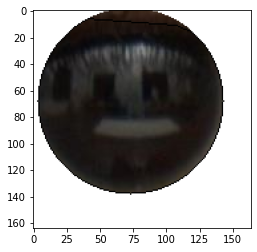

In [94]:
import matplotlib.pyplot as plt
import plotly.express as px

# def Mediapipe_Iris_Color(path):
#     '''
#     This function takes the image in path and Using Mediapipe calculates the Annular Mask of the images,
#     then calculates the HSV color of Annular mask.
#     and returns the dominant Iris colour percentage in a data frame.
#     '''

path='/home/roopesh/Desktop/New_Corpus/Brown/front (3).jpg'
image = cv2.imread(path)

#     plt.imshow(image)
#     plt.show()

# conversion numpy array into rgb image to show


image_bgr_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # converting from BGR to RGB

out = image_bgr_rgb.copy()
out_pupile = image_bgr_rgb.copy()

result = iris_detector.detect(image_bgr_rgb)

if not result is None:

    detected_pupils = result.detected_pupils,
    face_rect_detection = result.face_rect_detection_from_landmarks,
    face_rect_landmarks = result.face_rect_from_landmarks,
    face_landmarks = result.face_landmarks,
    face_rect_detection_from = result.face_rect_from_detection,
    face_landmarks_from_detection = result.face_landmarks_from_detection,
    left_iris_landmarks = result.left_iris_landmarks,
    left_eyelid_landmarks = result.left_eyelid_landmarks,
    right_iris_landmarks = result.right_iris_landmarks,
    right_eyelid_landmarks = result.right_eyelid_landmarks,
    left_iris_segmentation = result.left_iris_segmentation,
    right_iris_segmentation = result.right_iris_segmentation,
    eyes_landmarks = result.eyes_landmarks

    #         out_pupile_ = draw.draw_pupils(out_pupile, result.detected_pupils.left, result.detected_pupils.right, color_center = (255, 255, 255), color_contour = (255, 255, 255))
    #         out_pupile_ = draw.draw_rect(out_pupile_, result.face_rect_detection_from_landmarks, thickness=2, color=(255, 0, 0))
    #         out_pupile_ = draw.draw_list_pointd(out_pupile_, result.left_iris_landmarks,radius=3,color = (255, 255, 255))

    out_= draw.draw_contour(out, result.left_iris_segmentation,  thickness=1,color=(0, 0, 0))
    #             fig=px.imshow(out_, title='Out Image -Iris Segmentation')



    # flattening tuple of tuples of left iris landmarks into a list

    left_iris_tuple_of_tuple_Tolist = ([PointD_elements for PointD in left_iris_landmarks for PointD_elements in PointD])

    # Extraction of Points From LEFT IRIS Landmarks: Left Iris from Coder's Point of view

    left_iris_points = [(pointD.x, pointD.y) for pointD in left_iris_tuple_of_tuple_Tolist]

    center_point_LeftIris=(np.round(left_iris_points[0]))
    for left_x,left_y in [center_point_LeftIris]:
         lx, ly = left_x, left_y

    left_point_LeftIris=(np.round(left_iris_points[1]))
    for leftIris_left_x,LeftIris_left_y in [left_point_LeftIris]:
        LIL_x, LIL_y = leftIris_left_x, LeftIris_left_y

    right_point_LeftIris=(np.round(left_iris_points[3]))
    for rightIris_x,rightIris_y in [right_point_LeftIris]:
        RIL_x, RIL_y = rightIris_x, rightIris_y

    Top_point_LeftIris=(np.round(left_iris_points[2]))
    for TopIris_x,TopIris_y in [Top_point_LeftIris]:
        TI_x, TI_y = TopIris_x, TopIris_y

    Bottom_point_LeftIris=(np.round(left_iris_points[4]))
    for BottomIris_x,BottomIris_y in [Bottom_point_LeftIris]:
        BI_x, BI_y = BottomIris_x, BottomIris_y


    # Distance Formula to calculate the distance between center to left_Iris_ points to get radius of iris
    distance_left_iris_center = np.sqrt((lx - LIL_x) ** 2 + (ly - LIL_y) ** 2)

    # second Circular mask to take inner pupil area alone

    mask1 = np.zeros(out_.shape, dtype=np.uint8)     # Result from Mediapipe added here for second mask.
    center1= (int(left_x),int(left_y))
    radius1 = (int((distance_left_iris_center)))      # to scrap pupil area and other reflection area
    left_mask1 = cv2.circle(mask1, center1, radius1, (255, 255, 255), -1 )
    result1 = cv2.bitwise_and(out_, left_mask1)  # subtracting white region over masked area
    result1[mask1==0] = 255                                 # adding background Color- white
    plt.imshow(result1)
    plt.show

    # Cropping the inner pupil area from the second circular masked image (size should be same as the first masked and cropped result )

    x= int(RIL_x)       # x-axis --Landmarks points from top- right point from left iris, +3 for adjusting the size
    y= int(TI_y)     # y-axis --Landmarks points from top_ left of left iris, +3 for adjusting the size
    h= int(radius1*2.35)   # height --Radius of iris times 2.35,-3 for adjustment
    w=int(radius1*2.35)   # width  --Radius of iris times 2.35, -1 for adjustment
    crop1 = result1[y:y+h, x:x+w]
    
    

    plt.imshow(crop1)
    plt.show




       
# if __name__ == '__main__':
    
# #    images_files_dir= '/home/roopesh/Desktop/New_Corpus/Green/'
#    images_files_dir='/home/roopesh/Desktop/New_Corpus/Brown/front (3).jpg'
# #    images_files_dir= '/home/roopesh/Desktop/new_cvexp_results/V2.0/New_Blue_Eyes/Blue_Iris_Training_Image/' # Directory of the images

#    files = os.listdir(images_files_dir)
#    # sorted_file=sorted(files, key=lambda x : int(x[5:-4]))
#    for idx, file in enumerate( files):
#         image_path = images_files_dir + file
#         # print('debug', file)
#         mediapipe_iris_color_chart = Mediapipe_Iris_Color(image_path)           # Calling the Mediapipe_Iris_Color(image_path)
# #         print(mediapipe_iris_color_chart)
            
       

In [71]:
#    Extract Eye Lids 
eldt_lid_tuple_to_list=[pointe_elements for point in left_eyelid_landmarks for pointe_elements in point]
lef_eye_lid=[(pointe.x,pointe.y) for pointe in eldt_lid_tuple_to_list]
#             print(lef_eye_lid)

point_0= (np.round(lef_eye_lid[0]))
for p0x,p0y in [point_0]:
    pointx0,pointy0= p0x,p0y

point_1= (np.round(lef_eye_lid[1]))
for p1x,p1y in [point_1]:
    pointx1,pointy1= p1x,p1y 

point_2= (np.round(lef_eye_lid[2]))
for p2x,p2y in [point_2]:
    pointx2,pointy2= p2x,p2y

point_3= (np.round(lef_eye_lid[3]))
for p3x,p3y in [point_3]:
    pointx3,pointy3=  p3x,p3y 

point_4= (np.round(lef_eye_lid[4]))
for p4x,p4y in [point_4]:
    pointx4,pointy4= p4x,p4y

point_5= (np.round(lef_eye_lid[5]))
for p5x,p5y in [point_5]:
    pointx5,pointy5= p5x,p5y

point_6= (np.round(lef_eye_lid[6]))
for p6x,p6y in [point_6]:
    pointx6,pointy6= p6x,p6y

point_7= (np.round(lef_eye_lid[7]))
for p7x,p7y in [point_7]:
    pointx7,pointy7= p7x,p7y

point_8= (np.round(lef_eye_lid[8]))
for p8x,p8y in [point_8]:
    pointx8,pointy8= p8x,p8y

point_9= (np.round(lef_eye_lid[9]))
for p9x,p9y in [point_9]:
    pointx9,pointy9= p9x,p9y

point_10= (np.round(lef_eye_lid[10]))
for p10x,p10y in [point_10]:
    pointx10,pointy10= p10x,p10y

point_11= (np.round(lef_eye_lid[11]))
for p11x,p11y in [point_11]:
    pointx11,pointy11= p11x,p11y

point_12= (np.round(lef_eye_lid[12]))
for p12x,p12y in [point_12]:
    pointx12,pointy12= p12x,p12y

point_13= (np.round(lef_eye_lid[13]))
for p13x,p13y in [point_13]:
    pointx13,pointy13= p13x,p13y

point_14= (np.round(lef_eye_lid[14]))
for p14x,p14y in [point_14]:
    pointx14,pointy14= p14x,p14y


In [72]:
print( int(RIL_x),  int(TI_y)  )      # x-axis --Landmarks points from top- right point from left iris, +3 for adjusting the size
# x-axis --Landmarks points from top- right point from left iris, +3 for adjusting the size
    

1380 2431


In [73]:
print(pointx11,pointy11)

1425.0 2439.0


In [74]:
int(distance_left_iris_center)

72

In [83]:
# distance between point 4 and center of iris
distance_point_4_iris_center = np.sqrt((lx - p4x) ** 2 + (ly - p4y) ** 2)


In [84]:
int(distance_point_4_iris_center)

79

<function matplotlib.pyplot.show(close=None, block=None)>

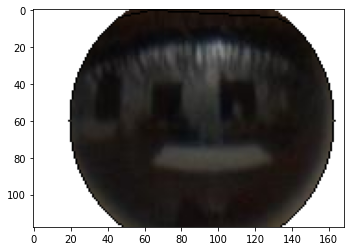

In [91]:
  # Cropping the inner pupil area from the second circular masked image (size should be same as the first masked and cropped result )

x1= int(pointx12)       # x-axis --Landmarks points from top- right point from left iris, +3 for adjusting the size
y1= int(pointy11)     # y-axis --Landmarks points from top_ left of left iris, +3 for adjusting the size
h1= int(distance_point_4_iris_center*1.5)   # height --Radius of iris times 2.35,-3 for adjustment
w1=int(radius1*2.35)   # width  --Radius of iris times 2.35, -1 for adjustment
crop2 = result1[y1:y1+h1, x1:x1+w1]



plt.imshow(crop2)
plt.show

In [31]:
int(pointx12)       # x-axis --Landmarks points from top- right point from left iris, +3 for adjusting the size


1361

In [54]:
int(pointy11)

2439

In [49]:
 LIL_y

2493.0

In [52]:

print(lx, ly) 

print(LIL_x, LIL_y) 


print(RIL_x, RIL_y) 


print(TI_x, TI_y) 


print(BI_x, BI_y) 

1452.0 2499.0
1524.0 2493.0
1380.0 2505.0
1447.0 2431.0
1457.0 2567.0


In [58]:
pointx4,pointy4

(1465.0, 2577.0)

In [59]:
h1

169